In [236]:
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

In [237]:
data = pd.read_csv('student-mat.csv')

In [238]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [239]:
print(data["absences"].mean())

5.708860759493671


In [240]:
data["Alc"] = data['Dalc'] + data['Walc']
data["Total_grade"] = data["G1"] + data["G2"] + data["G3"]

In [241]:
x = data.drop(["Total_grade"],axis=1)
y = data["Total_grade"]

In [242]:
x['school'] = x['school'].map({'GP': 0, 'MS': 1}).astype(int)
x['sex'] = x['sex'].map({'M': 0, 'F': 1}).astype(int)
x['address'] = x['address'].map({'R': 0, 'U': 1}).astype(int)
x['famsize'] = x['famsize'].map({'LE3': 0, 'GT3': 1}).astype(int)
x['Pstatus'] = x['Pstatus'].map({'A': 0, 'T': 1}).astype(int)
x['Mjob'] = x['Mjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
x['Fjob'] = x['Fjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
x['reason'] = x['reason'].map({'course': 0, 'other': 1, 'home': 2, 'reputation': 3}).astype(int)
x['guardian'] = x['guardian'].map({'mother': 0, 'father': 1, 'other': 2}).astype(int)
x['schoolsup'] = x['schoolsup'].map({'no': 0, 'yes': 1}).astype(int)
x['famsup'] = x['famsup'].map({'no': 0, 'yes': 1}).astype(int)
x['paid'] = x['paid'].map({'no': 0, 'yes': 1}).astype(int)
x['activities'] = x['activities'].map({'no': 0, 'yes': 1}).astype(int)
x['nursery'] = x['nursery'].map({'no': 0, 'yes': 1}).astype(int)
x['higher'] = x['higher'].map({'no': 0, 'yes': 1}).astype(int)
x['internet'] = x['internet'].map({'no': 0, 'yes': 1}).astype(int)
x['romantic'] = x['romantic'].map({'no': 0, 'yes': 1}).astype(int)

In [243]:
data = x

In [244]:
dummy_df = pd.get_dummies(x["Mjob"],prefix="Mjob")
x = pd.concat([x, dummy_df],axis=1)
x = x.drop(["Mjob"],axis=1)

In [245]:
dummy_df = pd.get_dummies(x["Fjob"],prefix="Fjob")
x = pd.concat([x, dummy_df],axis=1)
x = x.drop(["Fjob"],axis=1)

In [246]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int32
 1   sex         395 non-null    int32
 2   age         395 non-null    int64
 3   address     395 non-null    int32
 4   famsize     395 non-null    int32
 5   Pstatus     395 non-null    int32
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   reason      395 non-null    int32
 9   guardian    395 non-null    int32
 10  traveltime  395 non-null    int64
 11  studytime   395 non-null    int64
 12  failures    395 non-null    int64
 13  schoolsup   395 non-null    int32
 14  famsup      395 non-null    int32
 15  paid        395 non-null    int32
 16  activities  395 non-null    int32
 17  nursery     395 non-null    int32
 18  higher      395 non-null    int32
 19  internet    395 non-null    int32
 20  romantic    395 non-null    int3

In [247]:
x.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'Alc', 'Mjob_0', 'Mjob_1',
       'Mjob_2', 'Mjob_3', 'Mjob_4', 'Fjob_0', 'Fjob_1', 'Fjob_2', 'Fjob_3',
       'Fjob_4'],
      dtype='object')

In [248]:
categ = x[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','reason', 'guardian', 'traveltime', 'studytime', 'failures','schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher','internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc','health',  'Mjob_0', 'Mjob_1','Mjob_2', 'Mjob_3', 'Mjob_4', 'Mjob_0', 'Mjob_1', 'Mjob_2', 'Mjob_3','Mjob_4', 'Fjob_0', 'Fjob_1', 'Fjob_2', 'Fjob_3', 'Fjob_4']]

In [249]:
scale_x = x[["absences","G1","G2","G3","Alc"]]

In [250]:
for col in categ.columns:
    x[col] = pd.Categorical(x[col])
    

In [251]:
scale_x

,absences,G1,G2,G3,Alc
0,6,5,6,6,2
1,4,5,5,6,2
2,10,7,8,10,5
3,2,15,14,15,2
4,4,6,10,10,3
...,...,...,...,...,...
390,11,9,9,9,9
391,3,14,16,16,7
392,3,10,8,7,6
393,0,11,12,10,7


In [252]:
scaler = StandardScaler()

In [253]:
for col in scale_x.columns:
    x[col] = scaler.fit_transform(scale_x[[col]])

In [288]:
x.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'Alc', 'Mjob_0', 'Mjob_1',
       'Mjob_2', 'Mjob_3', 'Mjob_4', 'Fjob_0', 'Fjob_1', 'Fjob_2', 'Fjob_3',
       'Fjob_4'],
      dtype='object')

In [255]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [256]:
model1 = keras.models.Sequential()

In [257]:
model1.add(keras.layers.Dense(20,activation='relu',input_shape=X_train.shape[1:])),
model1.add(keras.layers.Dense(40,activation='relu'))
model1.add(keras.layers.Dense(1,activation='relu'))

In [258]:
model1.compile(loss="mean_squared_error", optimizer="adam",metrics = ['mse','mae'])

In [259]:
#обучение модели
history = model1.fit(X_train, y_train,epochs=20, validation_data=(X_valid,y_valid),batch_size=32)

Epoch 1/20
8/8 [==============================] - 1s 21ms/step - loss: 1000.0251 - mse: 1000.0251 - mae: 29.7571 - val_loss: 985.2939 - val_mse: 985.2939 - val_mae: 29.5586
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 894.9467 - mse: 894.9467 - mae: 27.9309 - val_loss: 872.3885 - val_mse: 872.3885 - val_mae: 27.5872
Epoch 3/20
8/8 [==============================] - 0s 5ms/step - loss: 778.8831 - mse: 778.8831 - mae: 25.7973 - val_loss: 748.9420 - val_mse: 748.9420 - val_mae: 25.2597
Epoch 4/20
8/8 [==============================] - 0s 5ms/step - loss: 653.3876 - mse: 653.3876 - mae: 23.3223 - val_loss: 613.1259 - val_mse: 613.1259 - val_mae: 22.5044
Epoch 5/20
8/8 [==============================] - 0s 5ms/step - loss: 522.8334 - mse: 522.8334 - mae: 20.4878 - val_loss: 472.1350 - val_mse: 472.1350 - val_mae: 19.3785
Epoch 6/20
8/8 [==============================] - 0s 5ms/step - loss: 387.5578 - mse: 387.5578 - mae: 17.1549 - val_loss: 333.7000 - val_mse: 333.7

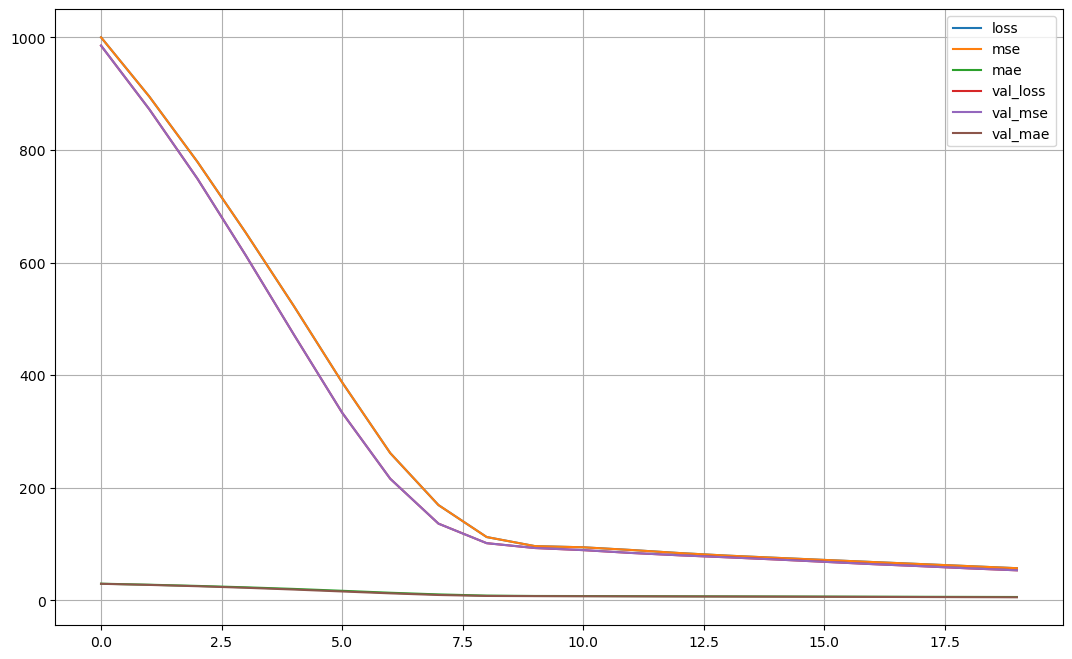

In [260]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(13,8))
plt.grid(True)
plt.show()

In [261]:
model2 = keras.models.Sequential()

In [262]:
model2.add(keras.layers.Dense(1000,activation='relu',input_shape=X_train.shape[1:])),
model2.add(keras.layers.Dense(500,activation='relu'))
model2.add(keras.layers.Dense(250,activation='relu'))
model2.add(keras.layers.Dense(1,activation='relu'))

In [263]:
model2.compile(loss="mean_squared_error", optimizer="adam",metrics = ['mse','mae'])

In [264]:
#обучение модели
history = model2.fit(X_train, y_train,epochs=20, validation_data=(X_valid,y_valid),batch_size=32)

Epoch 1/20
8/8 [==============================] - 1s 30ms/step - loss: 1134.8730 - mse: 1134.8730 - mae: 31.9286 - val_loss: 1176.8750 - val_mse: 1176.8750 - val_mae: 32.5938
Epoch 2/20
8/8 [==============================] - 0s 14ms/step - loss: 1134.8730 - mse: 1134.8730 - mae: 31.9286 - val_loss: 1176.8750 - val_mse: 1176.8750 - val_mae: 32.5938
Epoch 3/20
8/8 [==============================] - 0s 14ms/step - loss: 1134.8730 - mse: 1134.8730 - mae: 31.9286 - val_loss: 1176.8750 - val_mse: 1176.8750 - val_mae: 32.5938
Epoch 4/20
8/8 [==============================] - 0s 13ms/step - loss: 1134.8730 - mse: 1134.8730 - mae: 31.9286 - val_loss: 1176.8750 - val_mse: 1176.8750 - val_mae: 32.5938
Epoch 5/20
8/8 [==============================] - 0s 13ms/step - loss: 1134.8730 - mse: 1134.8730 - mae: 31.9286 - val_loss: 1176.8750 - val_mse: 1176.8750 - val_mae: 32.5938
Epoch 6/20
8/8 [==============================] - 0s 12ms/step - loss: 1134.8730 - mse: 1134.8730 - mae: 31.9286 - val_loss: 

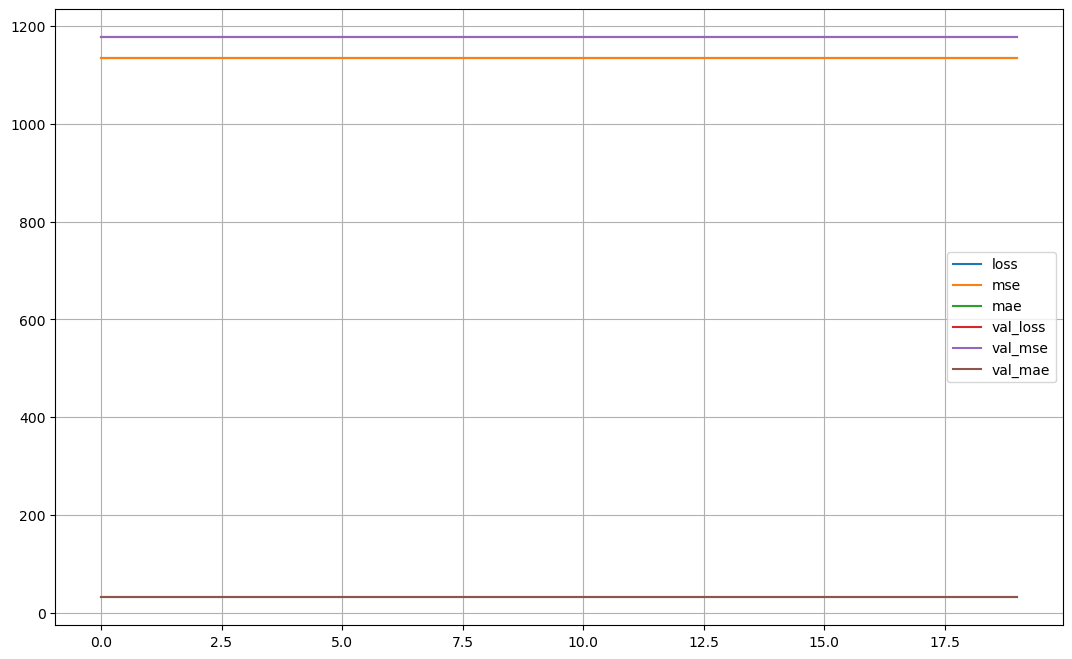

In [265]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(13,8))
plt.grid(True)
plt.show()

In [266]:
model3 = keras.models.Sequential()

In [267]:
model3.add(keras.layers.Dense(100,activation='relu',input_shape=X_train.shape[1:])),
model3.add(keras.layers.Dense(50,activation='relu'))
model3.add(keras.layers.Dense(1,activation='relu'))

In [268]:
model3.compile(loss="mean_squared_error", optimizer="adam",metrics = ['mse','mae'])

In [269]:
#обучение модели
history = model3.fit(X_train, y_train,epochs=10, validation_data=(X_valid,y_valid),batch_size=32)

Epoch 1/10
8/8 [==============================] - 1s 22ms/step - loss: 926.4553 - mse: 926.4553 - mae: 28.4907 - val_loss: 814.3988 - val_mse: 814.3988 - val_mae: 26.4697
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 658.3946 - mse: 658.3946 - mae: 23.4773 - val_loss: 543.2852 - val_mse: 543.2852 - val_mae: 20.8974
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 406.6582 - mse: 406.6582 - mae: 17.5540 - val_loss: 303.8599 - val_mse: 303.8599 - val_mae: 15.0677
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 211.2991 - mse: 211.2991 - mae: 11.9881 - val_loss: 147.2664 - val_mse: 147.2664 - val_mae: 10.0544
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 118.1069 - mse: 118.1069 - mae: 8.8167 - val_loss: 109.9423 - val_mse: 109.9423 - val_mae: 8.1500
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 108.2023 - mse: 108.2023 - mae: 8.3349 - val_loss: 108.6410 - val_mse: 108.6410 -

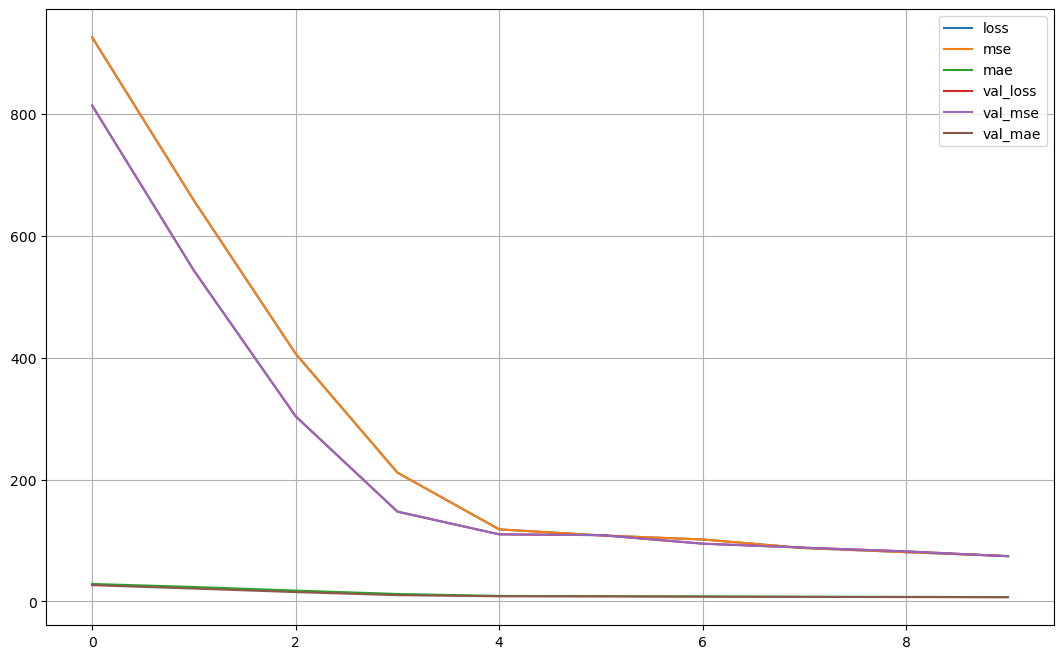

In [270]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(13,8))
plt.grid(True)
plt.show()

In [271]:
#проверка на тестовых данных
model1.evaluate(X_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 68.8962 - mse: 68.8962 - mae: 6.8565


[68.8962173461914, 68.8962173461914, 6.856497287750244]

In [284]:
X_test

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,...,Mjob_0,Mjob_1,Mjob_2,Mjob_3,Mjob_4,Fjob_0,Fjob_1,Fjob_2,Fjob_3,Fjob_4
329,0,1,17,1,1,1,4,4,0,0,...,0,0,0,0,1,0,0,0,0,1
318,0,1,17,0,1,1,3,4,0,1,...,1,0,0,0,0,0,0,0,1,0
317,0,1,18,1,1,1,4,3,0,0,...,0,0,1,0,0,0,0,1,0,0
65,0,1,16,1,0,1,4,3,0,0,...,0,0,0,0,1,0,0,0,1,0
59,0,1,16,1,1,1,4,2,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,0,1,18,0,1,0,3,2,2,0,...,0,0,1,0,0,0,0,0,1,0
140,0,0,15,1,1,1,4,3,0,1,...,0,0,0,0,1,0,0,0,1,0
142,0,1,15,1,1,1,4,4,0,0,...,0,0,0,0,1,0,0,0,1,0
306,0,0,20,1,1,0,3,2,0,2,...,0,0,0,1,0,0,0,1,0,0


In [272]:
#предсказание
y_pred = model1.predict(X_test)
y_pred[:10]

3/3 [==============================] - 0s 2ms/step


array([[36.384705],
       [36.23807 ],
       [32.19435 ],
       [38.994446],
       [35.21386 ],
       [34.918427],
       [33.64659 ],
       [31.250875],
       [28.356428],
       [39.791306]], dtype=float32)

In [273]:
true_vs_pred = pd.DataFrame({'Истинные': y_test, 'Предсказанные': y_pred.reshape(-1)})

import plotly.graph_objects as go
import numpy as np

random_x = np.linspace(0, len(true_vs_pred['Истинные']))

fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=true_vs_pred['Истинные'],
                    mode='lines',
                    name='истинные'))
fig.add_trace(go.Scatter(x=random_x, y=true_vs_pred['Предсказанные'],
                    mode='lines+markers',
                    name='предсказанные'))

fig.show()

In [296]:
import random
def generate_data(data,length):
    res = pd.DataFrame()
    for col in data.columns:
        temp = []
        temp_data = list(set(list(data[col])))
        for i in range(length):
            temp.append(random.randint(temp_data[0],temp_data[-1]))
        temp = pd.Series(temp)
        res[col] = temp

    dummy_df = pd.get_dummies(res["Mjob"],prefix="Mjob")
    res = pd.concat([res, dummy_df],axis=1)
    res = res.drop(["Mjob"],axis=1)
    dummy_df = pd.get_dummies(res["Fjob"],prefix="Fjob")
    res = pd.concat([res, dummy_df],axis=1)
    res = res.drop(["Fjob"],axis=1)

    y_pred = model1.predict(res)
    return y_pred
            
    

In [297]:
y_test_pred = generate_data(data,400)

13/13 [==============================] - 0s 667us/step


In [298]:
y_test_pred

array([[ 90.63965 ],
       [ 76.82541 ],
       [ 54.248146],
       [ 72.079834],
       [ 54.10767 ],
       [ 56.919125],
       [ 57.130146],
       [ 71.12384 ],
       [ 60.90705 ],
       [ 37.541664],
       [ 65.7551  ],
       [ 45.033447],
       [ 72.65676 ],
       [ 67.099335],
       [ 66.79591 ],
       [ 62.543457],
       [ 63.80779 ],
       [ 82.12781 ],
       [ 57.27424 ],
       [ 57.796173],
       [ 70.2804  ],
       [ 74.28616 ],
       [ 42.93947 ],
       [ 69.93562 ],
       [ 53.728233],
       [ 54.47259 ],
       [ 66.35133 ],
       [ 54.159843],
       [ 46.163433],
       [ 44.516068],
       [ 60.578392],
       [ 93.541916],
       [ 64.97254 ],
       [ 74.25765 ],
       [ 52.433445],
       [ 75.001396],
       [ 71.4767  ],
       [ 51.86772 ],
       [ 88.41614 ],
       [ 52.459938],
       [ 71.562195],
       [ 66.09106 ],
       [ 69.218765],
       [ 53.84983 ],
       [ 61.28681 ],
       [ 61.68811 ],
       [ 62.90341 ],
       [ 51.7